In [7]:
from signver.extractor import MetricExtractor
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img
from signver.utils.visualization_utils import plot_np_array, visualize_boxes

import numpy as np
import tensorflow as tf

In [3]:
model_path = "models/extractor/metric"
extractor = MetricExtractor() 
extractor.load(model_path)

In [8]:
file_url = "https://magazine.art21.org/wp-content/uploads/2009/06/signed-document-by-nam-june-paik-from-the-imas-historical-files.jpg"
file_url_2="https://swimmingfreestyle.net/wp-content/uploads/2019/10/contract-signature-page-example-new-elgin-munity-college-faculty-association-eccfa-of-contract-signature-page-example.png"
file_name = "signdoc.jpg" 
destination_dir = "data/test/localizer"
img_path = data_utils.download_file(file_url, file_name,  destination_dir)

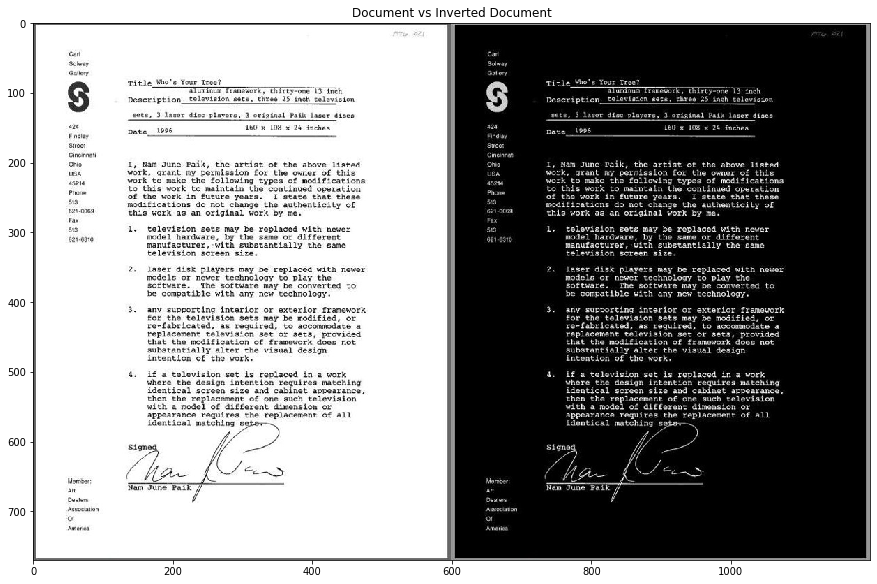

In [9]:
image_np = data_utils.img_to_np_array(img_path)
inverted_image_np = data_utils.invert_img(image_np) 

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]

plot_np_array( np.concatenate((image_np, inverted_image_np ), axis = 1), plot_title="Document vs Inverted Document")